<a href="https://colab.research.google.com/github/rizzlerhub/skill/blob/main/skilllca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df1 = pd.read_csv("Food_Preference.csv")
df2 = pd.read_csv("indian_food.csv")

merged_df = pd.merge(df1, df2, how='outer', left_on='Food', right_on='name')
print("Merged data:")
merged_df.head()

Merged data:


,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10.0,20.0,spicy,main course,Punjab,North
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5.0,40.0,spicy,main course,Punjab,North
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10.0,40.0,bitter,main course,Punjab,North
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10.0,40.0,spicy,main course,Punjab,North


In [4]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
file_path = "indian_food.csv"
df = pd.read_csv(file_path)

# Basic Data pre-processing
print("Dataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe(include='all'))
print("\nFirst 5 Rows:")
print(df.head())

# Checking for null values
print("\nNull Values in Each Column:")
print(df.isnull().sum())

# Handling Missing Data
# Dropping rows with any missing values
df_cleaned = df.dropna()
print("\nAfter Dropping Nulls:")
print(df_cleaned.isnull().sum())

# Filling missing values with column means (if numeric)
df_filled = df.fillna(df.mean(numeric_only=True))
print("\nDataset after Filling Nulls with Column Means:")
print(df_filled.isnull().sum())

# Value counts for a specific column ('diet' as an example)
print("\nValue Counts for 'diet':")
print(df['diet'].value_counts())

# Checking for Duplicates
print("\nNumber of Duplicated Rows:")
print(df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB

Dataset Description:
              name              ingredients        diet   prep_time  \
count          255                      255         255  255.000000   
unique         255                      252           2         NaN   
top     Balu shahi  Gram flour, ghee, sugar  vegetarian         NaN   
freq             1                       

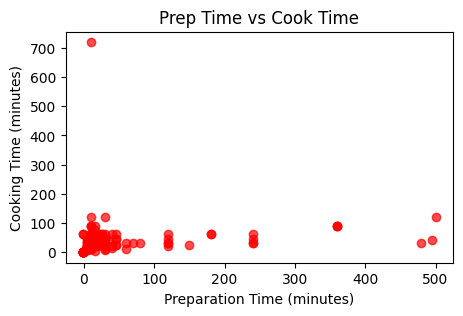

In [5]:
# Scatter Plot
plt.figure(figsize=(5, 3))
plt.scatter(df['prep_time'], df['cook_time'], alpha=0.7, color='r')
plt.title('Prep Time vs Cook Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.show()

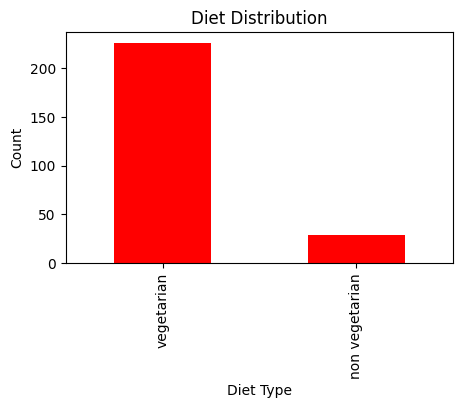

In [6]:
# Bar Plot
plt.figure(figsize=(5, 3))
df['diet'].value_counts().plot(kind='bar', color='red')
plt.title('Diet Distribution')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()

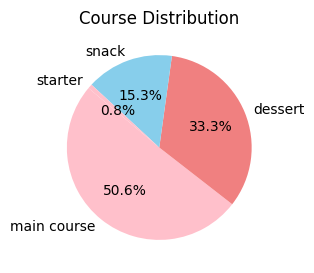

In [7]:
# Pie Chart
plt.figure(figsize=(5, 3))
df['course'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['pink', 'lightcoral', 'skyblue'])
plt.title('Course Distribution')
plt.ylabel('')
plt.show()

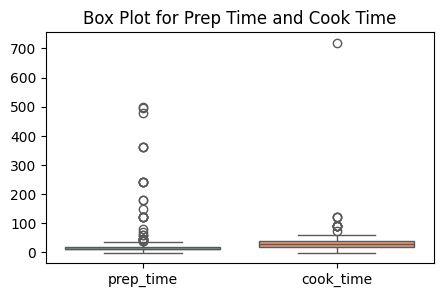

In [8]:
# Box Plot (Outliers)
plt.figure(figsize=(5, 3))
sns.boxplot(data=df[['prep_time', 'cook_time']], palette='Set2')
plt.title('Box Plot for Prep Time and Cook Time')
plt.show()

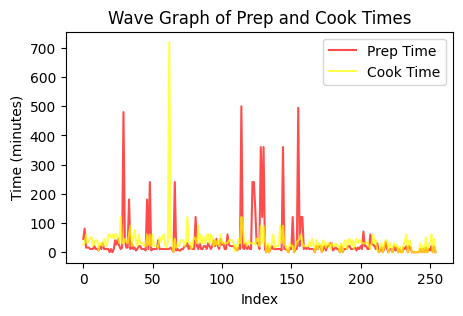

In [9]:
# Wave Graph (Uniform Curve)
plt.figure(figsize=(5, 3))
plt.plot(df['prep_time'], label='Prep Time', color='red', alpha=0.7)
plt.plot(df['cook_time'], label='Cook Time', color='yellow', alpha=0.7)
plt.title('Wave Graph of Prep and Cook Times')
plt.xlabel('Index')
plt.ylabel('Time (minutes)')
plt.legend()
plt.show()


Skewness of Numeric Columns:


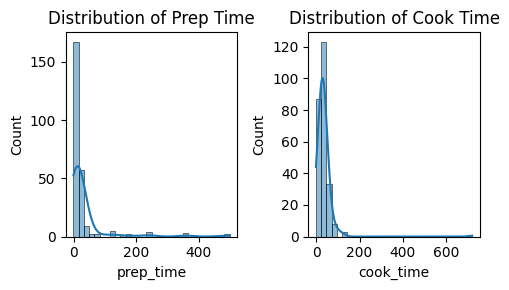

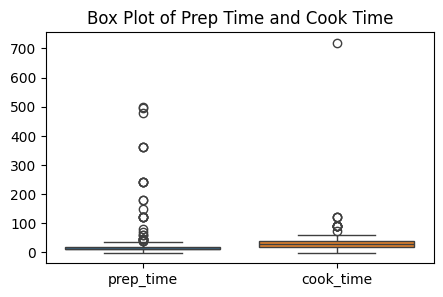

In [10]:
# Skewness
print("\nSkewness of Numeric Columns:")
df[['prep_time', 'cook_time']].skew()

fig, axes = plt.subplots(1, 2, figsize=(5, 3))

sns.histplot(df['prep_time'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Prep Time')

sns.histplot(df['cook_time'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cook Time')

plt.tight_layout()
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=df[['prep_time', 'cook_time']])
plt.title("Box Plot of Prep Time and Cook Time")
plt.show()


IQR:
prep_time    10.0
cook_time    20.0
dtype: float64

Lower Bound for Outliers:
prep_time    -5.0
cook_time   -10.0
dtype: float64

Upper Bound for Outliers:
prep_time    35.0
cook_time    70.0
dtype: float64


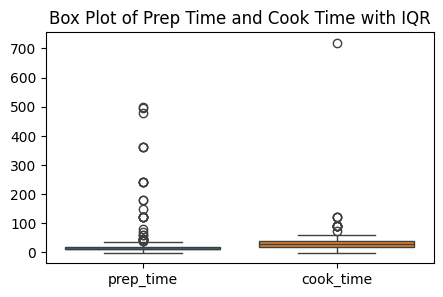

In [11]:
Q1 = df[['prep_time', 'cook_time']].quantile(0.25)
Q3 = df[['prep_time', 'cook_time']].quantile(0.75)
IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print("\nIQR:")
print(IQR)
print("\nLower Bound for Outliers:")
print(LB)
print("\nUpper Bound for Outliers:")
print(UB)

plt.figure(figsize=(5,3))
sns.boxplot(data=df[['prep_time', 'cook_time']])
plt.title("Box Plot of Prep Time and Cook Time with IQR")
plt.show()


Number of Outliers:
38


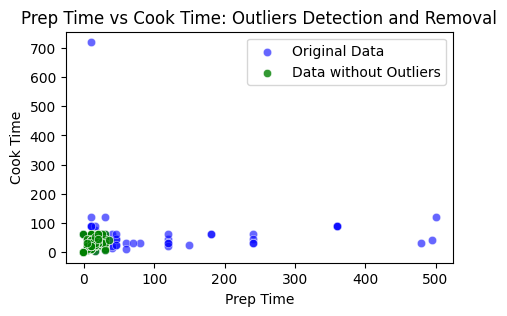

In [12]:
outliers = ((df[['prep_time', 'cook_time']] < (Q1 - 1.5 * IQR)) | (df[['prep_time', 'cook_time']] > (Q3 + 1.5 * IQR))).any(axis=1)

print("\nNumber of Outliers:")
print(outliers.sum())

df_no_outliers = df[~outliers]

plt.figure(figsize=(5, 3))

sns.scatterplot(x=df['prep_time'], y=df['cook_time'], label='Original Data', color='blue', alpha=0.6)

sns.scatterplot(x=df_no_outliers['prep_time'], y=df_no_outliers['cook_time'], label='Data without Outliers', color='green', alpha=0.8)

plt.title("Prep Time vs Cook Time: Outliers Detection and Removal")
plt.xlabel("Prep Time")
plt.ylabel("Cook Time")
plt.legend()
plt.show()


First 5 Rows of Normalized Data:
             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian   0.191876  -0.197825          sweet  dessert  West Bengal   
1  vegetarian   0.675221  -0.094028          sweet  dessert    Rajasthan   
2  vegetarian  -0.222420   0.528754          sweet  dessert       Punjab   
3  vegetarian  -0.222420  -0.094028          sweet  dessert    Rajasthan   
4  vegetarian  -0.222420   0.113566          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East  


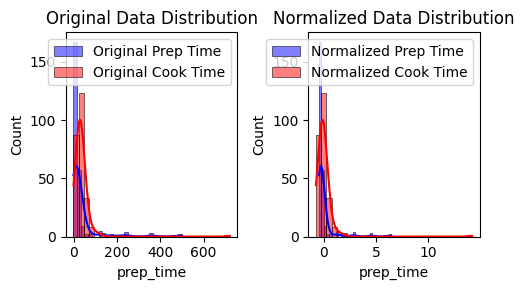

In [13]:
df_normalized = df.copy()
columns_to_normalize = ['prep_time', 'cook_time']
df_normalized[columns_to_normalize] = df[columns_to_normalize].apply(zscore)

print("\nFirst 5 Rows of Normalized Data:")
print(df_normalized.head())

plt.figure(figsize=(5, 3))

plt.subplot(1, 2, 1)
sns.histplot(df['prep_time'], kde=True, color='blue', label='Original Prep Time', bins=30)
sns.histplot(df['cook_time'], kde=True, color='red', label='Original Cook Time', bins=30)
plt.title("Original Data Distribution")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_normalized['prep_time'], kde=True, color='blue', label='Normalized Prep Time', bins=30)
sns.histplot(df_normalized['cook_time'], kde=True, color='red', label='Normalized Cook Time', bins=30)
plt.title("Normalized Data Distribution")
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()

df_normalized['diet'] = label_encoder.fit_transform(df_normalized['diet'])
df_normalized['course'] = label_encoder.fit_transform(df_normalized['course'])
df_normalized['flavor_profile'] = label_encoder.fit_transform(df_normalized['flavor_profile'])
df_normalized['state'] = label_encoder.fit_transform(df_normalized['state'])
df_normalized['region'] = label_encoder.fit_transform(df_normalized['region'])
df_normalized['name'] = label_encoder.fit_transform(df_normalized['name'])
df_normalized['ingredients'] = label_encoder.fit_transform(df_normalized['ingredients'])

df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            255 non-null    int64  
 1   ingredients     255 non-null    int64  
 2   diet            255 non-null    int64  
 3   prep_time       255 non-null    float64
 4   cook_time       255 non-null    float64
 5   flavor_profile  255 non-null    int64  
 6   course          255 non-null    int64  
 7   state           255 non-null    int64  
 8   region          255 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 18.1 KB


Training Data Shape:
X_train: (204, 8)
Y_train: (204,)

Testing Data Shape:
X_test: (51, 8)
Y_test: (51,)


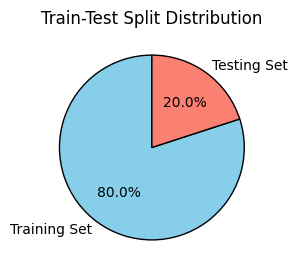

In [15]:
from sklearn.model_selection import train_test_split

x= df_normalized.drop(columns=['diet'])
y= df_normalized['diet']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Data Shape:")
print("X_train:", x_train.shape)
print("Y_train:", y_train.shape)
print("\nTesting Data Shape:")
print("X_test:", x_test.shape)
print("Y_test:", y_test.shape)

sizes = [len(y_train), len(y_test)]
labels = ['Training Set', 'Testing Set']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Train-Test Split Distribution')
plt.show()


First 5 Rows of Min-Max Scaled Data:
   name  ingredients  diet  prep_time  cook_time  flavor_profile  course  \
0    13          122     1   0.091816   0.036061               4       0   
1    27          100     1   0.161677   0.042996               4       0   
2    71           35     1   0.031936   0.084605               4       0   
3    76           95     1   0.031936   0.042996               4       0   
4    80          129     1   0.031936   0.056865               4       0   

   state  region  
0     24       2  
1     18       6  
2     17       3  
3     18       6  
4     24       2  


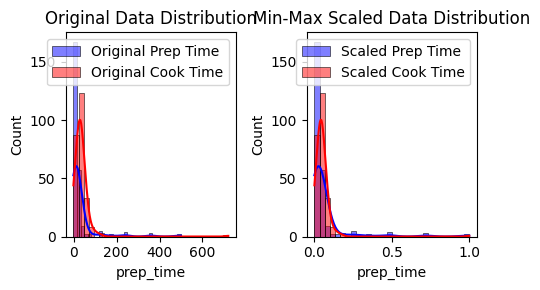

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Copy the normalized dataframe
df_min_max_scaled = df_normalized.copy()

# Columns to scale
columns_to_scale = ['prep_time', 'cook_time']

# Apply MinMax scaling
df_min_max_scaled[columns_to_scale] = scaler.fit_transform(df_normalized[columns_to_scale])

print("\nFirst 5 Rows of Min-Max Scaled Data:")
print(df_min_max_scaled.head())

plt.figure(figsize=(5, 3))

plt.subplot(1, 2, 1)
sns.histplot(df['prep_time'], kde=True, color='blue', label='Original Prep Time', bins=30)
sns.histplot(df['cook_time'], kde=True, color='red', label='Original Cook Time', bins=30)
plt.title("Original Data Distribution")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_min_max_scaled['prep_time'], kde=True, color='blue', label='Scaled Prep Time', bins=30)
sns.histplot(df_min_max_scaled['cook_time'], kde=True, color='red', label='Scaled Cook Time', bins=30)
plt.title("Min-Max Scaled Data Distribution")
plt.legend()

plt.tight_layout()
plt.show()

ANOVA F-test Scores for Each Feature:
          Feature  ANOVA F-test Score
1     ingredients            5.922719
5          course            5.566242
7          region            2.390094
3       cook_time            1.607218
0            name            1.294574
4  flavor_profile            0.764621
6           state            0.111264
2       prep_time            0.008262


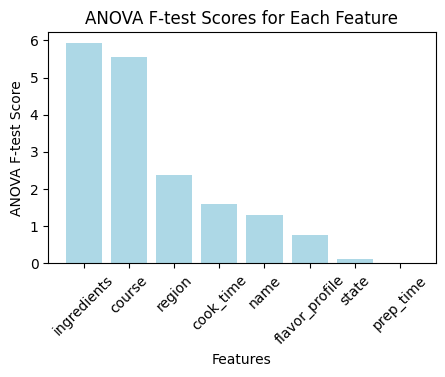

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(x_train, y_train)

# Get the scores for each feature
anova_scores = selector.scores_

# Create a DataFrame to display the ANOVA F-test scores for each feature
anova_df = pd.DataFrame({'Feature': x_train.columns, 'ANOVA F-test Score': anova_scores})

# Sort the DataFrame by ANOVA F-test score in descending order
anova_df = anova_df.sort_values(by='ANOVA F-test Score', ascending=False)

print("ANOVA F-test Scores for Each Feature:")
print(anova_df)

# Plot the ANOVA F-test scores for each feature
plt.figure(figsize=(5, 3))
plt.bar(anova_df['Feature'], anova_df['ANOVA F-test Score'], color='lightblue')
plt.xlabel('Features')
plt.ylabel('ANOVA F-test Score')
plt.title('ANOVA F-test Scores for Each Feature')
plt.xticks(rotation=45)
plt.show()

Chi-Square Test Statistic: 43.18917614664576
P-value: 2.2435961169551635e-09
Degrees of Freedom: 3
Expected Frequencies Table:
[[  9.66666667  14.67058824   4.43529412   0.22745098]
 [ 75.33333333 114.32941176  34.56470588   1.77254902]]


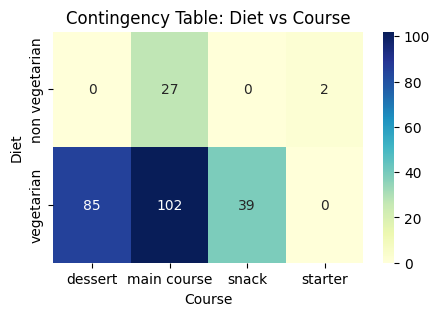

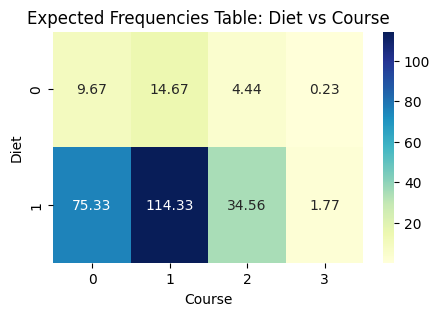

In [18]:
from scipy.stats import chi2_contingency
import seaborn as sns

import matplotlib.pyplot as plt

# Create a contingency table for 'diet' and 'course'
contingency_table = pd.crosstab(df['diet'], df['course'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Visualize the contingency table
plt.figure(figsize=(5, 3))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table: Diet vs Course')
plt.xlabel('Course')
plt.ylabel('Diet')
plt.show()

# Visualize the expected frequencies table
plt.figure(figsize=(5, 3))
sns.heatmap(expected, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Expected Frequencies Table: Diet vs Course')
plt.xlabel('Course')
plt.ylabel('Diet')
plt.show()

Pearson's correlation coefficient:
           prep_time  cook_time
prep_time   1.000000   0.144113
cook_time   0.144113   1.000000


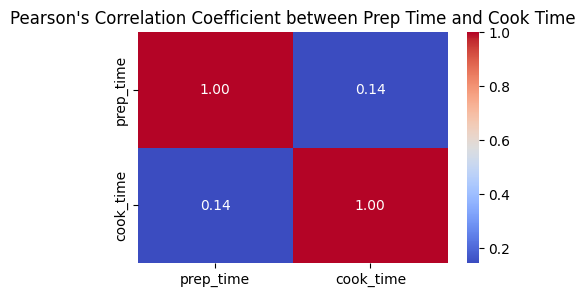

In [19]:
# Calculate Pearson's correlation coefficient between 'prep_time' and 'cook_time'
pearson_corr = df[['prep_time', 'cook_time']].corr(method='pearson')

print("Pearson's correlation coefficient:")
print(pearson_corr)

plt.figure(figsize=(5, 3))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pearson's Correlation Coefficient between Prep Time and Cook Time")
plt.show()

Information Gain for Each Feature:
          Feature  Information Gain
6           state          0.109055
4  flavor_profile          0.093476
7          region          0.073953
5          course          0.060493
1     ingredients          0.040609
3       cook_time          0.037213
0            name          0.030913
2       prep_time          0.012031


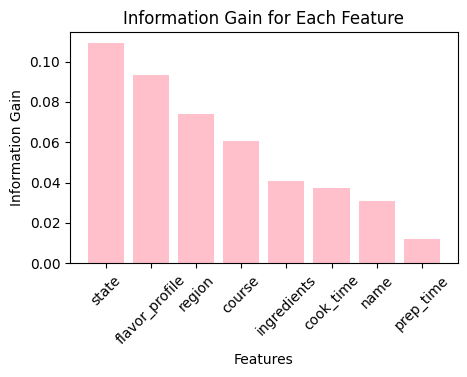

In [20]:
from sklearn.feature_selection import mutual_info_classif

# Calculate the information gain for each feature
info_gain = mutual_info_classif(x_train, y_train)

# Create a DataFrame to display the information gain for each feature
info_gain_df = pd.DataFrame({'Feature': x_train.columns, 'Information Gain': info_gain})

# Sort the DataFrame by information gain in descending order
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

print("Information Gain for Each Feature:")
print(info_gain_df)

import matplotlib.pyplot as plt

# Plot the information gain for each feature
plt.figure(figsize=(5, 3))
plt.bar(info_gain_df['Feature'], info_gain_df['Information Gain'], color='pink')
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Information Gain for Each Feature')
plt.xticks(rotation=45)
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing (Assuming categorical target and numerical features)
df = df.dropna()  # Drop missing values
X = df.drop(columns=['diet'])  # Features
y = df['diet']  # Target variable

# Convert categorical features to numerical if necessary
X = pd.get_dummies(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8823529411764706
Classification Report:
                 precision    recall  f1-score   support

non vegetarian       0.00      0.00      0.00         5
    vegetarian       0.90      0.98      0.94        46

      accuracy                           0.88        51
     macro avg       0.45      0.49      0.47        51
  weighted avg       0.81      0.88      0.85        51



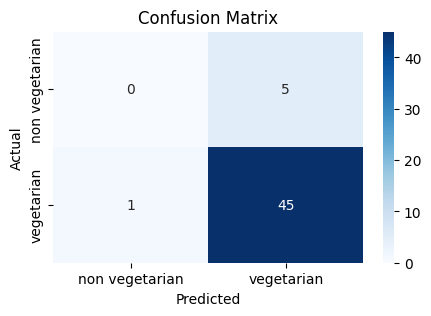

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy with Selected Features: 0.8823529411764706
Classification Report with Selected Features:
                 precision    recall  f1-score   support

non vegetarian       0.33      0.20      0.25         5
    vegetarian       0.92      0.96      0.94        46

      accuracy                           0.88        51
     macro avg       0.62      0.58      0.59        51
  weighted avg       0.86      0.88      0.87        51

Selected Features: Index(['prep_time', 'cook_time',
       'ingredients_Meat curry powder, chicken chunks, ginger, tomato, cinnamon',
       'ingredients_Naan bread, tomato sauce, skinless chicken breasts, heavy cream, garam masala',
       'flavor_profile_spicy', 'course_main course', 'course_starter',
       'state_Assam', 'state_NCT of Delhi', 'region_North East'],
      dtype='object')


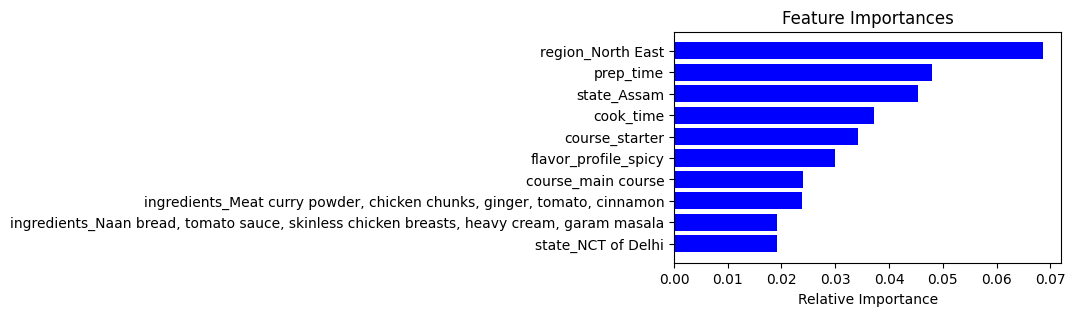

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Initialize the RandomForestClassifier with parallel processing
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the RandomForest model to get feature importances
rf_model.fit(X_train, y_train)

# Use SelectFromModel to select top features based on importance
selector = SelectFromModel(rf_model, prefit=True, max_features=10)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train a new RandomForestClassifier on selected features
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_selected.fit(X_train_selected, y_train)

# Predictions
y_pred_selected = rf_model_selected.predict(X_test_selected)

# Evaluation
print("Accuracy with Selected Features:", accuracy_score(y_test, y_pred_selected))
print("Classification Report with Selected Features:\n", classification_report(y_test, y_pred_selected))

# Print selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Plot feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(5, 3))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Feature Rankings:
          Feature  Ranking
0            name        1
1     ingredients        2
6           state        3
2       prep_time        4
7          region        5
4  flavor_profile        6
3       cook_time        7
5          course        8


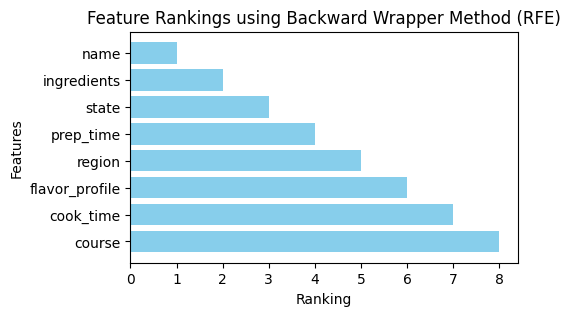

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Ensure x_train and y_train have the same number of samples
x_train = x_train.iloc[:len(y_train)].reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Initialize RFE with the RandomForest model
rfe = RFE(estimator=rf_model, n_features_to_select=1, step=1)

# Fit RFE
rfe.fit(x_train, y_train)

# Get the ranking of the features
ranking = rfe.ranking_

# Create a DataFrame to display the feature rankings
feature_ranking_df = pd.DataFrame({'Feature': x_train.columns, 'Ranking': ranking})

# Sort the DataFrame by ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

print("Feature Rankings:")
print(feature_ranking_df)

# Plot the feature rankings
plt.figure(figsize=(5, 3))
plt.barh(feature_ranking_df['Feature'], feature_ranking_df['Ranking'], color='skyblue')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.title('Feature Rankings using Backward Wrapper Method (RFE)')
plt.gca().invert_yaxis()
plt.show()

Feature Rankings:
          Feature  Ranking
0            name        1
1     ingredients        2
6           state        3
2       prep_time        4
7          region        5
4  flavor_profile        6
3       cook_time        7
5          course        8


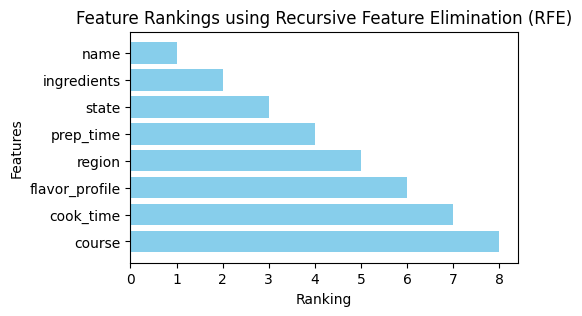

In [25]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Ensure x_train and y_train have the same number of samples
x_train = x_train.iloc[:len(y_train)].reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Initialize RFE with the RandomForest model
rfe = RFE(estimator=rf_model, n_features_to_select=1, step=1)

# Fit RFE
rfe.fit(x_train, y_train)

# Get the ranking of the features
ranking = rfe.ranking_

# Create a DataFrame to display the feature rankings
feature_ranking_df = pd.DataFrame({'Feature': x_train.columns, 'Ranking': ranking})

# Sort the DataFrame by ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

print("Feature Rankings:")
print(feature_ranking_df)

# Plot the feature rankings
plt.figure(figsize=(5, 3))
plt.barh(feature_ranking_df['Feature'], feature_ranking_df['Ranking'], color='skyblue')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.title('Feature Rankings using Recursive Feature Elimination (RFE)')
plt.gca().invert_yaxis()
plt.show()

Optimal number of features: 3
Feature Rankings:
          Feature  Ranking
0            name        1
1     ingredients        1
6           state        1
2       prep_time        2
7          region        3
4  flavor_profile        4
3       cook_time        5
5          course        6


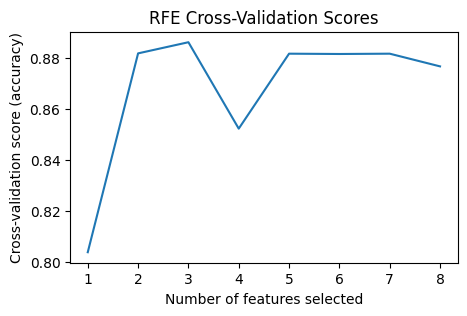

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFECV with the RandomForest model and cross-validation strategy
rfecv = RFECV(estimator=rf_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV
rfecv.fit(x_train, y_train)

# Get the optimal number of features
optimal_num_features = rfecv.n_features_

print("Optimal number of features:", optimal_num_features)

# Get the ranking of the features
ranking = rfecv.ranking_

# Create a DataFrame to display the feature rankings
feature_ranking_df = pd.DataFrame({'Feature': x_train.columns, 'Ranking': ranking})

# Sort the DataFrame by ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

print("Feature Rankings:")
print(feature_ranking_df)

# Plot the number of features vs. cross-validation scores
plt.figure(figsize=(5, 3))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title('RFE Cross-Validation Scores')
plt.show()